## Phil Edie

## Student ID: 300406035

## Identifying Spam Text Messages Using Lexical Features



# 1. Introduction and Research Question(s):



Spam text messages are becoming increasingly more prevalent as phone numbers become older and are more frequently reused.  Email services such as Gmail have included spam filters as a part of their service. However, many mobile providers don’t include this feature.  Introducing a spam filter has several privacy concerns. A spam filter based on the message contents would require the mobile provider to be able to read the contents of the message. An alternative approach would be to make predictions solely based on the linguistic features of the message. This would help to preserve some level of privacy for mobile users. 
The research question explored in this project is: 
Can spam text messages be easily identified using linguistic features?
To answer this question, I will be comparing the following features between spam and non-spam (Ham) messages to understand if any patterns exist:

-	Average Word Count
-	Percentage of words with typos
-	Average sentiment
-	Average lexical diversity
-	Frequency Distribution

I will then train a classification machine learning model that predicts whether a text message is spam based solely on these features, and then compare the results to a model trained directly on the text itself.
If the prediction accuracy is comparable, then our approach to spam filtering would be a feasible solution. 


# 2. Data and Description of Data:

I will be using UCI’s SMS Spam Collection Data Set from the UCI machine learning repository. I chose this dataset as it is one of the only publicly available datasets specific to text messages. More information can be found here: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
UCI also provides this dataset in a CSV format through Kaggle. This is the version of the dataset I used for this project, as it is easier to parse: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
This dataset contains two columns. One column is the classification (“Spam” or “Ham”) and the other is the text message content. I will be referring to non-spam messages as Ham to keep comparisons concise. The dataset contains 5572 rows. 747 messages are spam, and 4825 messages are ham. 


# 3. Explanation of the Program:

### Loading Data and Data Cleaning

I complete the following steps:
1.	I start by reading the CSV file and storing it as a Pandas DataFrame. This allows us to easily read the data and make fast computations on the dataset. We can apply operations to each row of the DataFrame using the DataFrame function assign().
2.	I then drop blank columns and rename the remaining columns “IsSpam” and “Text”.
3.	Values “ham” and “spam” are mapped to Boolean values, for easier processing.
4.	I then ensure that our dataset contains no null values. 
5.	All non-Ascii characters are removed, as these aren’t compatible with NTLK.
6.	All characters are set to lowercase. This is important later on when we calculate frequency distributions, as this calculation is case-sensitive.


### Data Analysis

Here I complete the following steps:
1.	I add a word count column to the table. I manually remove punctuation, then use NTLK’s word_tokenize function to get the word counts for each row. 

2.	I then add a typo count column to the table. I loop through each token of the text and assume that a word contains a typo when the word is not within the NTLK WordNet, or in the NTLK English stopwords set.

3.	I then add a sentiment column to the table. The sentiment is calculated using the NTLK Vader SentimentIntensityAnalyser. The sentiment is based on the compound score returned by the polarity_scores() function. 

4.	I then add a lexical diversity column. The lexical diversity is calculated by dividing the total unique tokens by the total amount of tokens. 

5.	Finally, I calculate the frequency distribution. I first divide the data into spam and ham sets. For both sets, I do the following:

  * Combine all texts into a list of texts.
  * Divide each text up into a list of tokens using NTLK’s word_tokenize()
  * Remove all stopwords from the list of tokens
  * Append the list of tokens to a final list
  * Pass the final list into NTLK’s FreqDist() function, to get a final frequency distribution.

  Using this information, I can manually compare the top 10 most common words between the spam and ham sets.


### Machine Learning

I use different sets of models and features to determine which combination provides the most accurate predictions.




Feature set 1: X = [Text], Y = [IsSpam]

This provides our baseline accuracy. The models are trained directly on the text itself. We would expect Feature Set 1 to have the highest average accuracy score. 

Feature set 2: X = [Text, WordCount, TypoCount, Sentiment, LexicalDiversity], Y = [IsSpam]

Feature set 2 aims to test whether including our linguistic features alongside our text improves the average accuracy score.

Feature set 3: X = [Text, WordCount, TypoCount, Sentiment], Y = [IsSpam]

Since Lexical Diversity isn’t significantly different between spam and ham, I repeated feature set 2 with lexical diversity excluded.

Feature set 4: X = [WordCount, TypoCount, Sentiment, LexicalDiversity], Y = [IsSpam]

Feature set 4 tests how accurate our model can be when trained purely on lexical features. 

Feature set 5: X = [WordCount, TypoCount, Sentiment], Y = [IsSpam]

This feature set 5 repeats feature set 4 without  LexicalDiversity.

For each feature set, I trained and tested on the following four models, using default parameters:

SVC, Gaussian Naiive Bays, Decision Tree Classifier, K-Neighbours Classifier.


I used the following process for each model:

1.	Split the model into train and test sets, with 90% of the data used for training. The data is randomly shuffled, with indexes reset.

2.	If the data contains the text column, we will encode the text data using SK-Learn’s TfidfVectorizer().

3.	Fit the model using the training data.

4.	Apply the same encoding to the text data in the test set, if the text column exists.

5.	Make predictions, and calculate an overall accuracy score.

6.	Save the accuracy scores for a final summary.


# 4. Python Program:

## Imports

In [1]:
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk, re
import pandas as pd
import nltk, re
import nltk
from nltk.corpus import wordnet as WN
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download(['stopwords', 'punkt'])

stop_words_en = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Dataset

I start by reading the CSV file and storing it as a Pandas DataFrame. This allows us to easily read the data and make fast computations on the dataset. We can apply operations to each row of the DataFrame using the DataFrame function assign().

To load the dataset locally, use the below with the correct file path.

`df = pd.read_csv('<PATH_TO_FOLDER_CONTAINING_IPYNB>/spam.csv', encoding_errors= 'replace')`

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/LING226/spam.csv', encoding_errors= 'replace')

# df = pd.read_csv('<PATH_TO_FOLDER_CONTAINING_IPYNB>/spam.csv', encoding_errors= 'replace')

display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

### Drop Empty Columns, and rename the remaining columns “IsSpam” and “Text”.

In [3]:
df.drop(df.columns[[2,3,4]], axis=1, inplace=True)
df.columns = ['IsSpam', 'Text']
display(df)

,IsSpam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Drop any rows with null values.

In [4]:
print('Shape before: ' , df.shape)
df = df.dropna(how='any',axis=0)
print('Shape after: ' , df.shape)

Shape before:  (5572, 2)
Shape after:  (5572, 2)


### Drop any rows with blank values.

In [5]:
print('Shape before: ' , df.shape)
df = df[df['Text'].astype(bool)]                                                                                                                  
print('Shape after: ' , df.shape)

Shape before:  (5572, 2)
Shape after:  (5572, 2)


### Convert 'Ham' and 'Spam' to boolean values.

In [6]:
d = {'ham': 0,'spam':1}
df['IsSpam']=df['IsSpam'].map(d)
df['IsSpam']=df['IsSpam'].astype('bool')
display(df)

,IsSpam,Text
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will �_ b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...


### Remove non Ascii characters.

All non-Ascii characters are removed, as these aren’t compatible with NTLK.

In [7]:
df['Text'] = df['Text'].str.encode('ascii', 'ignore').str.decode('ascii')
display(df)

,IsSpam,Text
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,True,This is the 2nd time we have tried 2 contact u...
5568,False,Will _ b going to esplanade fr home?
5569,False,"Pity, * was in mood for that. So...any other s..."
5570,False,The guy did some bitching but I acted like i'd...


### Set all Text values to lowercase.

This is important later on when we calculate frequency distributions, as this calculation is case-sensitive.

In [8]:
df['Text'] = df['Text'].str.lower()
display(df)

,IsSpam,Text
0,False,"go until jurong point, crazy.. available only ..."
1,False,ok lar... joking wif u oni...
2,True,free entry in 2 a wkly comp to win fa cup fina...
3,False,u dun say so early hor... u c already then say...
4,False,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,True,this is the 2nd time we have tried 2 contact u...
5568,False,will _ b going to esplanade fr home?
5569,False,"pity, * was in mood for that. so...any other s..."
5570,False,the guy did some bitching but i acted like i'd...


### Distribution of Spam vs Non Spam

We can see an uneven distribution of spam and ham texts in the dataset.

False    4825
True      747
Name: IsSpam, dtype: int64


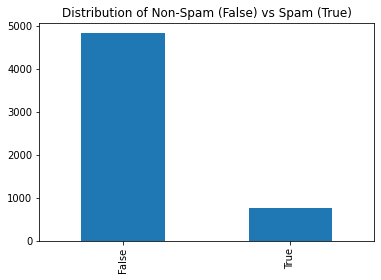

In [9]:
plot = df.IsSpam.value_counts().plot(kind='bar', title='Distribution of Non-Spam (False) vs Spam (True)')
print(df.IsSpam.value_counts())

## Data Analysis

### Add word count column

In [10]:
def get_tokens(line):
    """ Takes a string, removes any punctuation, then returns a list of tokens. """
    line = remove_punct(line)
    return nltk.word_tokenize(line)

def remove_punct(text):
  # Remove punctuation
  for character in string.punctuation: # contains this punctuation: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
    text = text.replace(character, '')
  return text

In [11]:
df = df.assign(WordCount=df['Text'].apply(lambda x: len(get_tokens(x))))
display(df)

,IsSpam,Text,WordCount
0,False,"go until jurong point, crazy.. available only ...",20
1,False,ok lar... joking wif u oni...,6
2,True,free entry in 2 a wkly comp to win fa cup fina...,28
3,False,u dun say so early hor... u c already then say...,11
4,False,"nah i don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,True,this is the 2nd time we have tried 2 contact u...,30
5568,False,will _ b going to esplanade fr home?,7
5569,False,"pity, * was in mood for that. so...any other s...",9
5570,False,the guy did some bitching but i acted like i'd...,26


### Compare typo ratios between Spam and Ham

#### Functions

In [12]:
# Help from https://stackoverflow.com/questions/40188226/nltks-spell-checker-is-not-working-correctly

def line_spelling_error_count(line):
  count = 0
  for i in get_tokens(line):
      if not WN.synsets(i) and i not in stop_words_en:
        count += 1
  return count

In [13]:
df = df.assign(TypoCount=df['Text'].apply(line_spelling_error_count))
display(df)

,IsSpam,Text,WordCount,TypoCount
0,False,"go until jurong point, crazy.. available only ...",20,5
1,False,ok lar... joking wif u oni...,6,2
2,True,free entry in 2 a wkly comp to win fa cup fina...,28,8
3,False,u dun say so early hor... u c already then say...,11,1
4,False,"nah i don't think he goes to usf, he lives aro...",13,3
...,...,...,...,...
5567,True,this is the 2nd time we have tried 2 contact u...,30,6
5568,False,will _ b going to esplanade fr home?,7,0
5569,False,"pity, * was in mood for that. so...any other s...",9,1
5570,False,the guy did some bitching but i acted like i'd...,26,2


### Sentiment Analysis

In [14]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
def sentiment_lookup(sentence):
  sentiment = sid.polarity_scores(sentence)
  return sentiment['compound']

In [16]:
df = df.assign(Sentiment=df['Text'].apply(sentiment_lookup))
display(df)

,IsSpam,Text,WordCount,TypoCount,Sentiment
0,False,"go until jurong point, crazy.. available only ...",20,5,0.6249
1,False,ok lar... joking wif u oni...,6,2,0.4767
2,True,free entry in 2 a wkly comp to win fa cup fina...,28,8,0.7964
3,False,u dun say so early hor... u c already then say...,11,1,0.0000
4,False,"nah i don't think he goes to usf, he lives aro...",13,3,-0.1027
...,...,...,...,...,...
5567,True,this is the 2nd time we have tried 2 contact u...,30,6,0.8805
5568,False,will _ b going to esplanade fr home?,7,0,0.0000
5569,False,"pity, * was in mood for that. so...any other s...",9,1,-0.2960
5570,False,the guy did some bitching but i acted like i'd...,26,2,0.8934


### Lexical Diversity

In [17]:
def lexical_diversity(input):
    tokens = get_tokens(input)
    if(len(tokens)) == 0:
      return 0
      
    lexical_diversity = len(set(tokens)) / len(tokens)
    return lexical_diversity

In [18]:
df = df.assign(LexicalDiversity=df['Text'].apply(lexical_diversity))
display(df)

,IsSpam,Text,WordCount,TypoCount,Sentiment,LexicalDiversity
0,False,"go until jurong point, crazy.. available only ...",20,5,0.6249,1.000000
1,False,ok lar... joking wif u oni...,6,2,0.4767,1.000000
2,True,free entry in 2 a wkly comp to win fa cup fina...,28,8,0.7964,0.857143
3,False,u dun say so early hor... u c already then say...,11,1,0.0000,0.818182
4,False,"nah i don't think he goes to usf, he lives aro...",13,3,-0.1027,0.923077
...,...,...,...,...,...,...
5567,True,this is the 2nd time we have tried 2 contact u...,30,6,0.8805,0.833333
5568,False,will _ b going to esplanade fr home?,7,0,0.0000,1.000000
5569,False,"pity, * was in mood for that. so...any other s...",9,1,-0.2960,1.000000
5570,False,the guy did some bitching but i acted like i'd...,26,2,0.8934,1.000000


### Frequency Distribution

In [19]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

def find_frequency_dist(line_list):
  all_tokens = []

  for line in line_list:
    tokens = get_tokens(line)
    tokens_no_stopwords = [i for i in tokens if i not in stop_words_en]
    all_tokens.extend(tokens_no_stopwords)
  
  return FreqDist(all_tokens)

In [20]:
spam_freq_dist = find_frequency_dist(df.loc[df['IsSpam'] == True, 'Text'].to_list())
ham_freq_dist = find_frequency_dist(df.loc[df['IsSpam'] == False, 'Text'].to_list())

print("Spam Frequency Distribution:", spam_freq_dist.most_common(10))
print("Ham Frequency Distribution:", ham_freq_dist.most_common(10))
print("Spam Hapaxes:", spam_freq_dist.hapaxes())
print("Ham Hapaxes:", ham_freq_dist.hapaxes())

Spam Frequency Distribution: [('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113)]
Ham Frequency Distribution: [('u', 972), ('im', 458), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 268), ('go', 247), ('got', 243), ('ur', 240)]
Spam Hapaxes: ['tb', 'chgs', 'xxxmobilemovieclub', 'httpwap', 'xxxmobilemovieclubcomnqjkgighjjgcbl', 'macedonia', 'goalsteam', 'trywales', 'scotland', '4txt120', 'poboxox36504w45wq', '5month', 'confirm', '07732584351', 'rodger', 'burns', 'jersey', 'devils', 'detroit', 'red', 'wings', 'ice', 'hockey', 'incorrect', 'divorce', 'barbie', 'kens', 'stuff', '0871277810910pmin', '5903', '09064019788', 'box42wr29c', '7548', '4041', 'gravel', 'nt', 'youll', 'svc', '69988', 'havent', 'replied', 'female', 'annoncement', '07046744435', 'bootydelious', '32f', 'yes434', 'no434', 'wwwsmsacubootydelious', 'bangbabes', 'way', 'bangb', 'internetservice', 'menu', '09061701939',

## Machine Learning

### Resources:

https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd

https://towardsdatascience.com/spam-or-ham-introduction-to-natural-language-processing-part-2-a0093185aebd

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

### Imports

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
def train_and_test_model(model, X, y):
  # Split the data into train and test sets.

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, shuffle=True)

  # Reset indexes (Prevents incorrect joins)

  X_train = X_train.reset_index().drop(['index'], axis=1)
  X_test = X_test.reset_index().drop(['index'], axis=1)
  y_train = y_train.reset_index().drop(['index'], axis=1)
  y_test = y_test.reset_index().drop(['index'], axis=1)

  # If the Text column is included, train and fit the vectorizer using the training set.
  if 'Text' in X.columns:
    vectorizer = TfidfVectorizer()
    encoded = vectorizer.fit_transform(X_train['Text']).toarray()
    encoded = pd.DataFrame(encoded)
    X_train = X_train.join(encoded)
    X_train = X_train.drop(['Text'], axis=1)

  model.fit(X_train, y_train)

  # If the text column is included, apply the same transformation to test set.
  if 'Text' in X.columns:
    encoded = vectorizer.transform(X_test['Text']).toarray()
    encoded = pd.DataFrame(encoded)
    X_test = X_test.join(encoded)
    X_test = X_test.drop(['Text'], axis=1)

  # Make predictions using the test set, and display the confusion matrix.

  y_pred = model.predict(X_test)
  print("-------")
  print("Model:" + str(model))
  print("Confusion matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("Accuracy Score:")
  score = accuracy_score(y_test, y_pred)
  print(score)
  return score

In [23]:
def compare_models(feature_set_number, X, y):
  scores = {}
  scores['FeatureSetNumber'] = feature_set_number
  scores['SVC'] = train_and_test_model(SVC(random_state = 0), X, y)
  scores['GaussianNB'] = train_and_test_model(GaussianNB(), X, y)
  scores['DecisionTreeClassifier'] = train_and_test_model(DecisionTreeClassifier(random_state = 0), X, y)
  scores['KNeighborsClassifier'] = train_and_test_model(KNeighborsClassifier(), X, y)
  return scores


In [24]:
# Our y is consistent across all models. 
y = pd.DataFrame(df['IsSpam'])

### Feature Set 1:

X = [Text]

Y = [IsSpam]

In [25]:
X = pd.DataFrame(df['Text'])
feature_set_1_scores = compare_models(1, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------
Model:SVC(random_state=0)
Confusion matrix:
[[491   0]
 [  8  59]]
Accuracy Score:
0.985663082437276


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------
Model:GaussianNB()
Confusion matrix:
[[438  53]
 [  3  64]]
Accuracy Score:
0.899641577060932
-------
Model:DecisionTreeClassifier(random_state=0)
Confusion matrix:
[[487   4]
 [ 11  56]]
Accuracy Score:
0.9731182795698925


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


-------
Model:KNeighborsClassifier()
Confusion matrix:
[[491   0]
 [ 36  31]]
Accuracy Score:
0.9354838709677419


### Feature Set 2:

X = [Text, WordCount, TypoCount, Sentiment, LexicalDiversity]

Y = [IsSpam]

In [26]:
X = df.drop(['IsSpam'], axis=1)
feature_set_2_scores = compare_models(2, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:SVC(random_state=0)
Confusion matrix:
[[477  14]
 [ 37  30]]
Accuracy Score:
0.9086021505376344


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:GaussianNB()
Confusion matrix:
[[438  53]
 [  3  64]]
Accuracy Score:
0.899641577060932


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:DecisionTreeClassifier(random_state=0)
Confusion matrix:
[[482   9]
 [  9  58]]
Accuracy Score:
0.967741935483871


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:KNeighborsClassifier()
Confusion matrix:
[[468  23]
 [ 28  39]]
Accuracy Score:
0.9086021505376344


### Feature Set 3:
X = [Text, WordCount, TypoCount, Sentiment]

Y = [IsSpam]

In [27]:
X = df.drop(['IsSpam', 'LexicalDiversity'], axis=1)
feature_set_3_scores = compare_models(3, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:SVC(random_state=0)
Confusion matrix:
[[477  14]
 [ 37  30]]
Accuracy Score:
0.9086021505376344


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:GaussianNB()
Confusion matrix:
[[438  53]
 [  3  64]]
Accuracy Score:
0.899641577060932


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:DecisionTreeClassifier(random_state=0)
Confusion matrix:
[[484   7]
 [  8  59]]
Accuracy Score:
0.9731182795698925


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


-------
Model:KNeighborsClassifier()
Confusion matrix:
[[471  20]
 [ 28  39]]
Accuracy Score:
0.9139784946236559


### Feature Set 4:

X = [WordCount, TypoCount, Sentiment, LexicalDiversity]

Y = [IsSpam]

In [28]:
X = df.drop(['Text', 'IsSpam'], axis=1)
feature_set_4_scores = compare_models(4, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------
Model:SVC(random_state=0)
Confusion matrix:
[[476  15]
 [ 39  28]]
Accuracy Score:
0.9032258064516129
-------
Model:GaussianNB()
Confusion matrix:
[[468  23]
 [ 30  37]]
Accuracy Score:
0.9050179211469535
-------
Model:DecisionTreeClassifier(random_state=0)
Confusion matrix:
[[466  25]
 [ 29  38]]
Accuracy Score:
0.9032258064516129
-------
Model:KNeighborsClassifier()
Confusion matrix:
[[466  25]
 [ 33  34]]
Accuracy Score:
0.8960573476702509


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Feature Set 5:
X = [WordCount, TypoCount, Sentiment]

Y = [IsSpam]

In [29]:
X = df.drop(['Text', 'IsSpam', 'LexicalDiversity'], axis = 1)
feature_set_5_scores = compare_models(5, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------
Model:SVC(random_state=0)
Confusion matrix:
[[477  14]
 [ 39  28]]
Accuracy Score:
0.9050179211469535
-------
Model:GaussianNB()
Confusion matrix:
[[469  22]
 [ 37  30]]
Accuracy Score:
0.8942652329749103
-------
Model:DecisionTreeClassifier(random_state=0)
Confusion matrix:
[[462  29]
 [ 25  42]]
Accuracy Score:
0.9032258064516129
-------
Model:KNeighborsClassifier()
Confusion matrix:
[[467  24]
 [ 34  33]]
Accuracy Score:
0.8960573476702509


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 5. Results and Discussion:

### Lexical Analysis:

In [30]:
spam_word_count = df.loc[df['IsSpam'] == True, 'WordCount'].sum()
ham_word_count = df.loc[df['IsSpam'] == False, 'WordCount'].sum()

spam_average_word_count = (spam_word_count / df.loc[df['IsSpam'] == True].shape[0])
ham_average_word_count = (ham_word_count / df.loc[df['IsSpam'] == False].shape[0])

print("Spam average word count:", spam_average_word_count)
print("Ham average word count:", ham_average_word_count)

Spam average word count: 23.564926372155288
Ham average word count: 13.975129533678757


In [31]:
spam_typo_count = df.loc[df['IsSpam'] == True, 'TypoCount'].sum()
ham_typo_count = df.loc[df['IsSpam'] == False, 'TypoCount'].sum()

spam_word_count = df.loc[df['IsSpam'] == True, 'WordCount'].sum()
ham_word_count = df.loc[df['IsSpam'] == False, 'WordCount'].sum()

spam_percentage_of_words_with_typos = (spam_typo_count / spam_word_count) * 100
ham_percentage_of_words_with_typos = (ham_typo_count / ham_word_count) * 100


print("Spam total typos: ", spam_typo_count)
print("Ham total typos: ", ham_typo_count)
print("Percentage of spam words with typos:", spam_percentage_of_words_with_typos, "%")
print("Percentage of ham words with typos:", ham_percentage_of_words_with_typos, "%")

Spam total typos:  3705
Ham total typos:  8459
Percentage of spam words with typos: 21.047548713287508 %
Percentage of ham words with typos: 12.544861337683525 %


In [32]:
spam_df = df.loc[df['IsSpam'] == True]
ham_df = df.loc[df['IsSpam'] == False]

spam_average_sentiment = spam_df['Sentiment'].sum() / len(spam_df)
ham_average_sentiment = ham_df['Sentiment'].sum() / len(ham_df)

print("Spam Sentiment: ", spam_average_sentiment)
print("Ham Sentiment: ", ham_average_sentiment)

Spam Sentiment:  0.440570281124498
Ham Sentiment:  0.15124992746113988


In [33]:
spam_df = df.loc[df['IsSpam'] == True]
ham_df = df.loc[df['IsSpam'] == False]

spam_diversity = spam_df['LexicalDiversity'].sum() / len(spam_df)
ham_diversity = ham_df['LexicalDiversity'].sum() / len(ham_df)

print("Spam Average Lexical Diversity: ", spam_diversity)
print("Ham Average Lexical Diversity: ", ham_diversity)

Spam Average Lexical Diversity:  0.9365141684121667
Ham Average Lexical Diversity:  0.9508276026592045


In [34]:
ham_freq_str = str(spam_freq_dist.most_common(10))

def pretty_print_freq_dist(freq_dist):
  freq_str = str(freq_dist.most_common(10))
  freq_str = freq_str.replace('[', '')
  freq_str = freq_str.replace(']', '')
  return freq_str

summary_data = {"Label": ["Spam", "Ham"], 
                "AverageWordCount": [spam_average_word_count, ham_average_word_count], 
                "PercentageOfWordsWithTypos": [spam_percentage_of_words_with_typos, ham_percentage_of_words_with_typos],
                "AverageSentiment": [spam_average_sentiment, ham_average_sentiment],
                "AverageLexicalDiversity": [spam_diversity, ham_diversity],
                "MostCommonWords": [pretty_print_freq_dist(spam_freq_dist), pretty_print_freq_dist(ham_freq_dist)]}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Label,AverageWordCount,PercentageOfWordsWithTypos,AverageSentiment,AverageLexicalDiversity,MostCommonWords
0,Spam,23.564926,21.047549,0.44057,0.936514,"('call', 347), ('free', 216), ('2', 173), ('tx..."
1,Ham,13.975130,12.544861,0.15125,0.950828,"('u', 972), ('im', 458), ('2', 305), ('get', 3..."




#### Average Word Count: 
We can see that spam texts tend to be much longer than ham messages. ~10.59 words more on average. This makes sense since spam messages need to contain enough information to convince the recipient to complete a call to action. 

####Percentage of words with typos:
We can see that spam messages also tend to contain much more typos than ham messages. ~8.5% more words with typos on average. This was in line with expectations, as spam messages are often poorly written.

#### Average Sentiment:
We can see that spam messages tend to have a stronger positive sentiment on average. I was surprised by this outcome. I expected the average sentiment to be closer to 0, as many spam messages can be threatening.

#### Average Lexical Diversity:
We can see no significant difference between spam and ham messages. I was surprised by this, as I expected spam messages to have lower lexical diversity than ham messages. I realise that because text messages tend to be very short, there is a much higher probability that all words in the message are unique. This explains the very high lexical diversity in both spam and ham messages.

#### Most Common Words:

We can see a common trend in spam messages. Spam messages tend to contain a call to action. We can see that 6 out of the 10 most common words relate to a call to action: “call”, “free”, “txt”, “mobile”, “text”, and “claim”. Spam top 10 common words only overlap the ham top 10 common words with “u”, “2”, and “ur”. 


### Machine Learning:

In [35]:
summary_machine_learning = [feature_set_1_scores, feature_set_2_scores, feature_set_3_scores, feature_set_4_scores, feature_set_5_scores]
summary_machine_learning_df = pd.DataFrame(summary_machine_learning)
summary_machine_learning_df['AverageScore'] = (summary_machine_learning_df.drop(['FeatureSetNumber'], axis = 1).sum(axis = 1)) / (len(feature_set_1_scores) - 1)
display(summary_machine_learning_df)

,FeatureSetNumber,SVC,GaussianNB,DecisionTreeClassifier,KNeighborsClassifier,AverageScore
0,1,0.985663,0.899642,0.973118,0.935484,0.948477
1,2,0.908602,0.899642,0.967742,0.908602,0.921147
2,3,0.908602,0.899642,0.973118,0.913978,0.923835
3,4,0.903226,0.905018,0.903226,0.896057,0.901882
4,5,0.905018,0.894265,0.903226,0.896057,0.899642


The above table compares accuracy scores for different combinations of feature sets and machine learning models. 

From our results, we can see that Feature Set 1 was the most accurate on average, with an average accuracy score of 0.948. This was expected as our model was being trained directly on the text content. Our least accurate feature set was Feature Set 5, with an average accuracy of 0.899. 

We can see no significant difference between Feature Set 2 and Feature Set 3 (0.002688%). We also see virtually no difference between Feature Set 4 and Feature Set 5 (0.00224%). This shows that including or excluding lexical diversity had no real effect on the outcome of the dataset. 

I was surprised that Feature Set 2 and Feature Set 3 had a lower accuracy score than Feature Set 1. I expected that including the lexical data along with the text data would help the model distinguish between the two datasets. 

Our most successful feature set/model combination was Feature Set 1 + SVC, with an accuracy score of 0.985.  Our least successful feature set/model combination was Feature Set 5 + GaussianNB, with an accuracy score of 0.894. 

Our results show that we can use the lexical features alone can be used to make relatively accurate predictions on whether a message is spam or ham. (~90% accurate).


# 6: Reflection:

While we achieved good results with our data, this project had several limitations.

One limitation was due to the size of the messages. Since text messages are so short, we cannot effectively compare lexical diversity. Both the spam dataset and the ham dataset had lexical diversity scores close to 1 as a result.

Another limitation was the relatively small dataset. While the total number of ham messages was adequate (4825 total), there was only a small number of spam messages (747 total). We would likely achieve higher accuracy scores with a larger number of spam data to train on. 

Another limitation is how we calculate typos. Our method considers a token to contain typos when the token isn’t contained in the WordNet set or the English Stopwords Set. This means that common slang such as ‘lol’ would be counted as a typo used when they are widely used and understood. This also means that other acronyms would also be counted as typos. If I were to continue this project, I would include a set of common text acronyms as an additional set to check each token against.

Another limitation is the age of the data. The UCI SMS Spam Collection Data Set was donated on 22-06-2012. The underlying data is likely much older than this. Because older phones didn't include auto-completion, we would expect acronyms to be more common during older text messages. Using our method of calculating typo percentages, we would expect newer text messages to have fewer typos than old messages. This may make it more difficult for our model to predict whether newer text messages are spam or ham. 

Finally, our machine learning models were all used with default parameters. We would likely achieve greater results with parameter optimisation, for example through a grid search. Since optimising parameters is time-consuming and computationally expensive, it was outside the scope of this project. 
